In [3]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 15 16:45:30 2023

@author: Fernanda
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [4]:
# Your data
powerVishay = np.array([77, 25, 8, 7.7])
dist = np.array([1, 5, 9, 15])

In [5]:
# Define the function you want to fit to the data
def func(x, a, b):
    return a * np.exp(b * x)

In [7]:
# Use curve_fit to fit the function to the data
params, covariance = curve_fit(func, dist, powerVishay)

In [22]:
# Extract the fitted parameters
a_fit, b_fit = params

# Generate points for the fitted curve
x_fit = np.linspace(min(dist)-1, max(dist)+15, 200)

y_fit = func(x_fit, a_fit, b_fit)


In [9]:
# experimental led data
N = 5
intensitySource = y_fit[0]/N

print(f'Intensity at the source per LED: {intensitySource:.2f}')


Intensity at the source per LED: 20.14


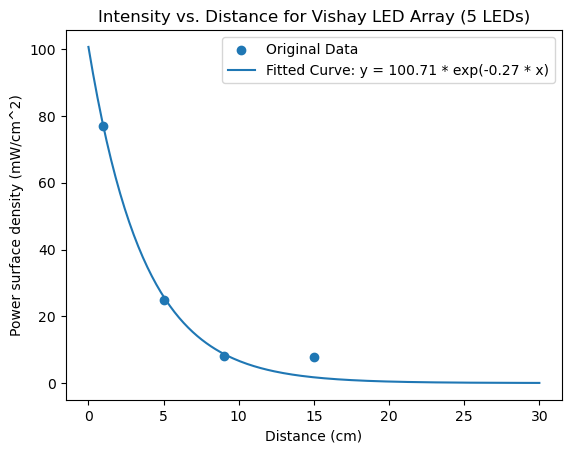

In [10]:
# Plot the original data and the fitted curve
plt.scatter(dist, powerVishay, label='Original Data')
plt.plot(x_fit, y_fit, label=f'Fitted Curve: y = {a_fit:.2f} * exp({b_fit:.2f} * x)')
plt.xlabel('Distance (cm)')
plt.ylabel('Power surface density (mW/cm^2)')
plt.legend()
plt.title(f"Intensity vs. Distance for Vishay LED Array ({N} LEDs)")
plt.show()

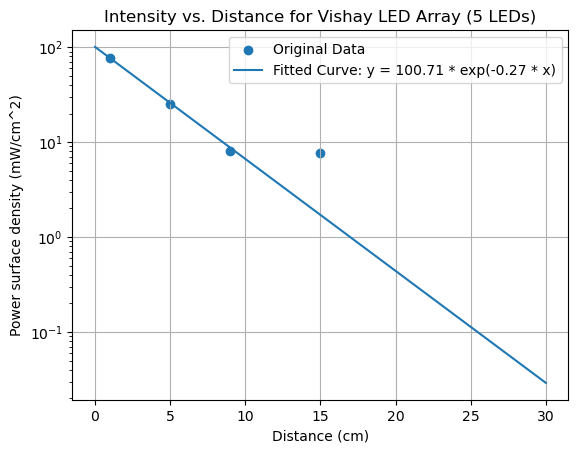

In [11]:
# Plot the original data and the fitted curve
plt.scatter(dist, powerVishay, label='Original Data')
plt.plot(x_fit, y_fit, label=f'Fitted Curve: y = {a_fit:.2f} * exp({b_fit:.2f} * x)')
plt.xlabel('Distance (cm)')
plt.ylabel('Power surface density (mW/cm^2)')
plt.legend()
plt.title(f"Intensity vs. Distance for Vishay LED Array ({N} LEDs)")
plt.grid()
plt.yscale("log")  # Use a logarithmic scale for better visualization
plt.show()

In [23]:
# Constants
wavelength = 810  # Wavelength of the NIR LED in nanometers
num_groups = 4  # Number of groups of LEDs

In [24]:
# Define the positions and intensities of the LED groups
group_positions = [(0.1,0.1,1), (1,0.1,0.1), (0.1,1,0.1), (-1,0.1,0.1)]  # (x, y,z) positions of the LED groups
# 60*5 = 300
N_top = 60
N_Back = 60
N_side = 60
intensity_at_source_top = intensitySource * N_top  # Intensity at the source (r = 0)
intensity_at_source_sides = intensitySource * 2 *N_side
intensity_at_source_back = intensitySource * N_Back 

In [ ]:
a_fit, b_fit
def intensity_dist(x,initial):
    return a_fit * np.exp(b_fit * x)

In [ ]:
# Calculate intensity as a function of distance (inverse square law) for multiple LED groups
def intensity(x,y,z):
    intensity_top = intensity_dist(,intensity_at_source_top)
    intensity_left = intensity_dist(distance,intensity_at_source_top)
    total_intensity = 0
    for x, y, z in group_positions:
        r = np.sqrt((x * distance) ** 2 + (y * distance) ** 2 + (z * distance) ** 2) 
        total_intensity += intensity_at_source_top /(4 * np.pi * (np.sqrt((x * distance) ** 2 ) ** 2)) + 2*intensity_at_source_sides/ (4 * np.pi * (np.sqrt((y * distance) ** 2 ) **2)) + intensity_at_source_back / (4 * np.pi * (np.sqrt((z * distance) )** 2)**2) 
    
    return total_intensity

# Define a range of distances to study
distances = np.linspace(1, 100, 100)  # Adjust the range as needed (in cm)

# Calculate intensities for the distances
intensities = [intensity(d) for d in distances]

In [ ]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(distances, intensities, label=f'Wavelength {wavelength} nm ({num_groups} groups)')
plt.xlabel("Distance (cm)")
plt.ylabel("Intensity (W/m^2)")
plt.title(f"Intensity vs. Distance for Multiple LED Groups")
plt.legend()
plt.grid()
#plt.yscale("log")  # Use a logarithmic scale for better visualization
plt.show()